<a href="https://colab.research.google.com/github/dsdayat/HW_EDA/blob/main/HW_EDAII_AGUS_NUR_HIDAYAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Perform standard data cleansing (10 points)

    ○ Missing values

    ○ Duplicated values

2.  Perform standard EDA with rich interpretations! (70 points)

    ○ Statistical summary of columns (20 points)

    ○ Univariate analysis (20 points)

    ○ Multivariate analysis (30 points)


3.  Perform deep-dive exploration (20 points)

    ○ Ask minimum 2 questions

    ○ At least 1 of them should involve group-by aggregation!













In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('telco.csv')

In [4]:
dfn=df.copy()

In [5]:
dfn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
dfn['TotalCharges']=pd.to_numeric(dfn['TotalCharges'], errors='coerce')

In [9]:
dfn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# **1. Perform standard data cleansing (10 points)**

    ○ Missing values

    ○ Duplicated values

# **Missing values**

In [10]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
dfn.isna().sum() * 100 / len(dfn)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [12]:
dfn[dfn['TotalCharges'].isna()] #lihat data yang nan, tenurenya 0, bisa di negasi /dihilangkan

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
dfn=dfn[~dfn['TotalCharges'].isna()]#menegasikan missing value

In [14]:
dfn.info()#cek apa data  missing valuenya sudah hilang dan datanya sesuai

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [15]:
dfn.isna().sum() * 100 / len(dfn)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

# **Duplicated values**

In [16]:
dfn.duplicated().sum()

0

In [17]:
dfn = dfn.drop_duplicates()#drop kalo ada duplicated data

In [18]:
dfn.duplicated().sum()#cek lagi ada duplicated atau engga

0

# **2.  Perform standard EDA with rich interpretations! (70 points)**

    ○ Statistical summary of columns (20 points)

    ○ Univariate analysis (20 points)

    ○ Multivariate analysis (30 points)



In [19]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# **Statistical summary of columns**

In [20]:
#bikin kategori 
categoricals = dfn.select_dtypes(include=['object'])
numericals = dfn.select_dtypes(exclude=['object'])
nums = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

In [21]:
numericals.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Observation Statistical Summary untuk Numerical
1. Nilai minimum dan maximum  OK reasonable
2. [Tenure], mean > median has skewed distribution
3. [MonthlyCharges], mean < median has skewed distribution
4. [Total charges], mean > median has skewed distribution

In [22]:
categoricals.describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


### Observation Statistical Summary untuk Categoricals
1. There are 7032 customers, dominated by male who single without dependents and has phone services.
2. fiber optic is the most common used for internetservice
3. Monthly contract with electronic check payment is the most common practice and not make churn. 


In [23]:
#detail dari categorical yang columnya banyak
for col in categoricals:
  print(f"Value counts of {col} column")
  print(dfn[col].value_counts(), '\n')

Value counts of customerID column
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No i

# **Univariate analysis**

analisa bikin boxplot untuk cari tau apakah ada outliers, data distribusinya gimana setiap kolom



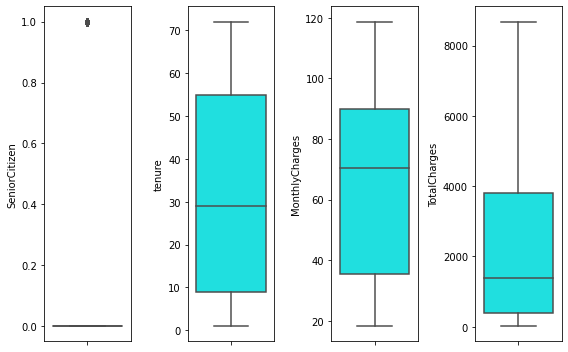

In [24]:
plt.figure(figsize=(8,5))

features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=dfn[features[i]], color='cyan')
    plt.tight_layout()

Observation Boxplot
1. there is no outliers

In [25]:
outlier = dfn['SeniorCitizen'].max()

dfn[dfn['SeniorCitizen'] == outlier]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


# Inspect Column Distribution (KDE Plots)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

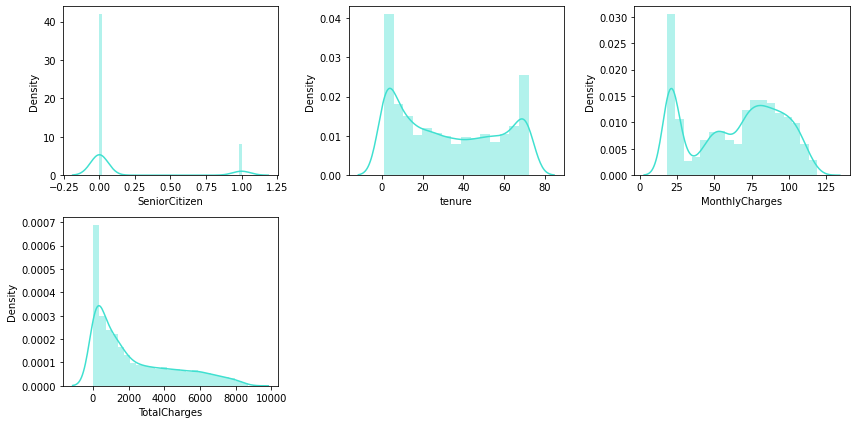

In [26]:
plt.figure(figsize=(12,6))
features = nums
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=dfn[features[i]], color='turquoise')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation Distribution Column
1. since the feauture of [SeniorCitizen] only has two choice, the plot shown symetrical but imbalance

1. The most customers are (distribution peak):
*   not senior Citizen
*   who have 5 months Tenure
*   who have about 20 monthly charges
*   who has about 200 total charges

2. Tenure and Monthly charges have Multi modal plot

3. Total Charges is positively skewed (log transformation is necessary if implemented on modelling)

In [27]:
import numpy as np

In [28]:
dfn['TotalCharges_log'] = np.log(dfn['TotalCharges'] + 1)#log transformation if used for modelling

<Figure size 576x360 with 0 Axes>

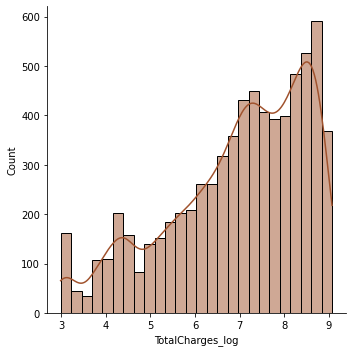

<Figure size 576x360 with 0 Axes>

In [29]:
from seaborn.distributions import kdeplot
sns.displot(x=dfn['TotalCharges_log'],color='sienna',kde=True)
plt.figure(figsize=(8,5))


# **Multivariate analysis**

In [30]:
dfn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_log
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3.429137
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,7.544597
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4.692723
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7.518471
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,5.028148


In [31]:
dfn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_log
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3.429137
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,7.544597
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4.692723
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7.518471
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,5.028148


In [32]:
categoricals.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [33]:
# binning Churn ke Status 1=Churn 0=No Churn
def c(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)
    
dfn['binChurn'] = dfn['Churn'].apply(c)

In [34]:
ctg= ['gender',	'Partner'	,'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

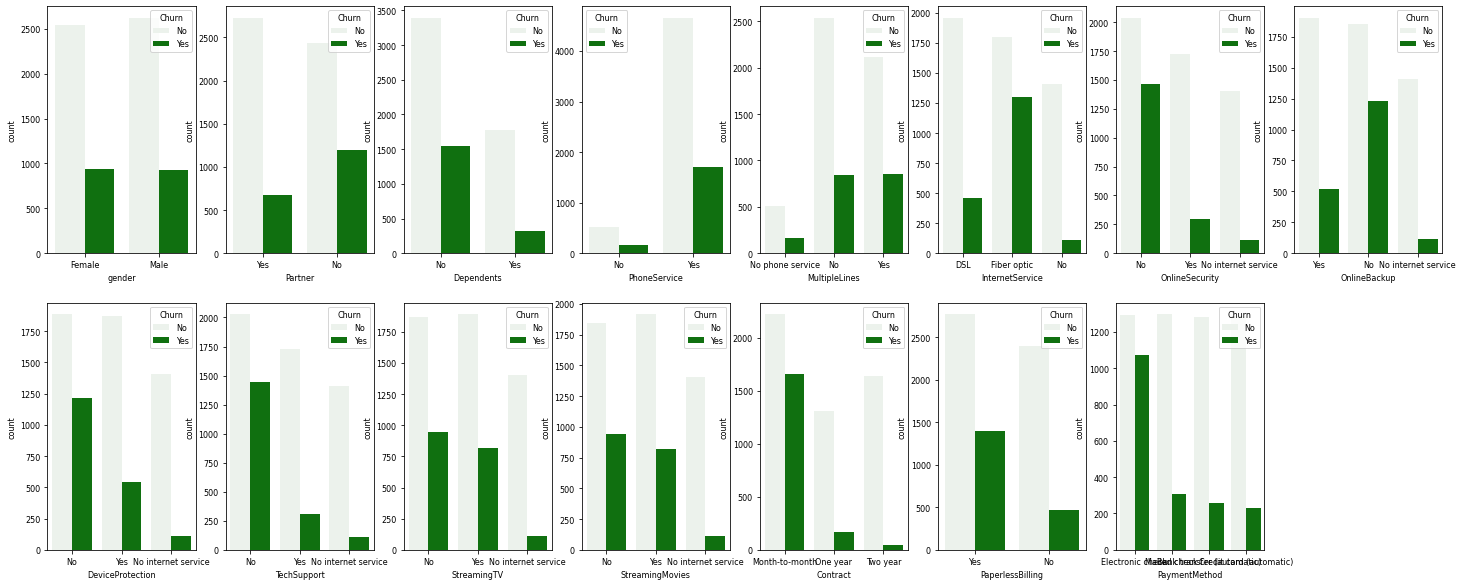

In [35]:
plt.figure(figsize=(25,10))
plt.rcParams.update({'font.size': 8})
features = ctg
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.countplot(data=dfn,x=dfn[features[i]],hue='Churn',color='green')
    plt.xlabel(features[i])
    

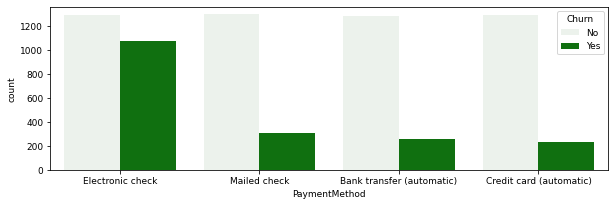

In [36]:
plt.figure(figsize=(10,3))
plt.rcParams.update({'font.size': 9})
sns.countplot(data=dfn,
            hue='Churn',
            x='PaymentMethod',color='green')

**Inference**,

*goals= to retain the customers*

The Background of Behaviour Costumers which not give Churn rate  are mostly =


*   have Partner , 


*   Both of with dependents and without dependents are effect the churn equally


equally but 
*   Use Phoneservices with no multiplelines
*   Use DSL Internet Service with Online Security,Online Backup,Device Protection, Tech Support, Streaming TV and Movies

*   Have two years contract
*   No Paperless Billing and using Credit Card payment







,








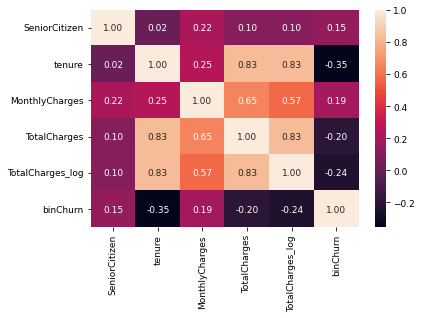

In [37]:
correlation = dfn.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')



*   total charges and tenure are highly correlated each other we can choose for modelling later



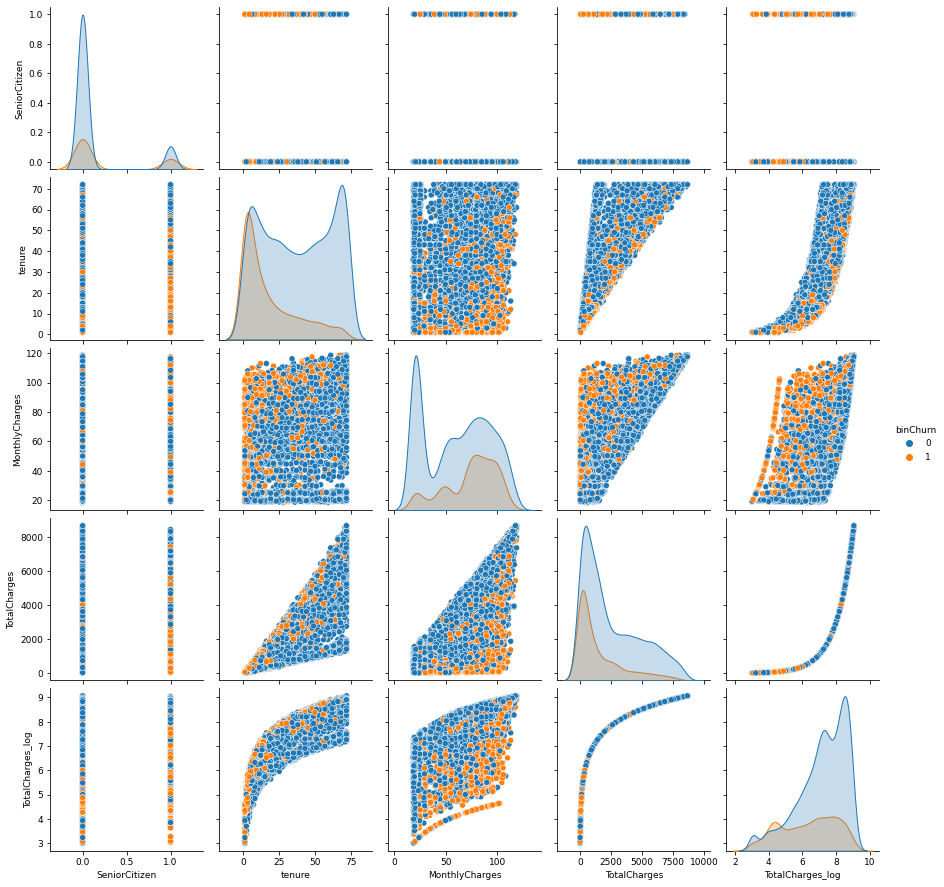

In [38]:
sns.pairplot(dfn, hue='binChurn')

# **EDA Conclussion**


*   There are only some Missing values and No duplicated rows. We've handled them with droping method

*   There is  skewed plot on some feature (log transformation is necessary if implemented on modelling)

*   There is no Outliers on the data

*   total charges and tenure are highly correlated each other we can choose for modelling later





# **3.  Perform deep-dive exploration (20 points)**

    ○ Ask minimum 2 questions

    ○ At least 1 of them should involve group-by aggregation!

# **questions**
1. How long the average tenure based on Contract and Churn Condition?
2. How many Customer left and stay based on Internet Service ?
3. How many average total Charges of based on Internet Service ? ?

In [95]:
dfn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_log,binChurn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3.429137,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,7.544597,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4.692723,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7.518471,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,5.028148,1


In [137]:
#1. How long the average tenure based on Contract and Churn Condition?
satu=dfn.groupby(['Contract','Churn']).agg(tenure_avg = ('tenure','mean'))
satu

tenure_avg
Contract       Churn            
Month-to-month No      21.033333
               Yes     14.016918
One year       No      41.705972
               Yes     44.963855
Two year       No      56.948687
               Yes     61.270833

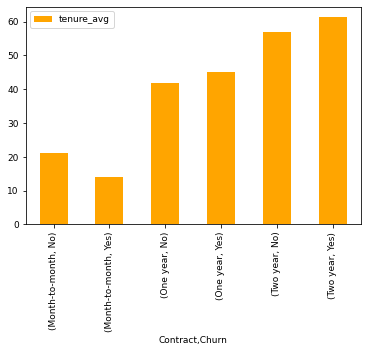

In [141]:
satu.plot(y='tenure_avg',kind="bar",color='orange')
plt.show()

**Inference**
1. Monthly contract shown  the lowest Churn rate, and the average of Stayed Customer still up forward through the left one.



2. Anual and Two year Contract shown will be Churn after contract ended


In [132]:
#2. How many Customer left and stay based on Internet Service ?
dua = dfn.groupby(['InternetService','Churn']).agg(Total_Churn = ('Churn','count'))
dua

Total_Churn
InternetService Churn             
DSL             No            1957
                Yes            459
Fiber optic     No            1799
                Yes           1297
No              No            1407
                Yes            113

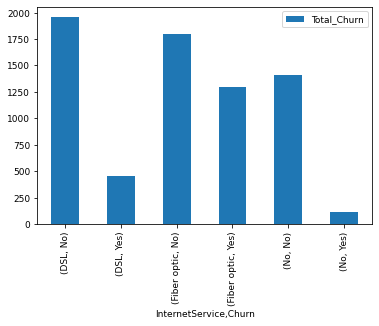

In [130]:
dua.plot(y='Total_Churn',kind="bar")
plt.show()

**Inference**

Fiber Optics is One of InternetService which give The biggest Churn 

In [133]:
#3. How many average total Charges of based on Internet Service ?
tiga = dfn.groupby(['InternetService']).agg(average_monthlyCharges = ('MonthlyCharges','mean'))
tiga

,average_monthlyCharges
InternetService,
DSL,58.088017
Fiber optic,91.500129
No,21.076283


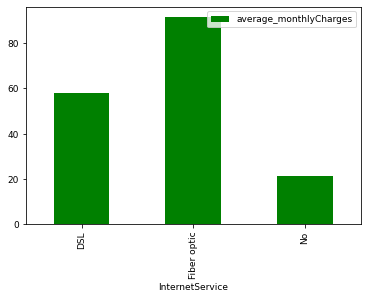

In [136]:
tiga.plot(y='average_monthlyCharges',kind="bar", color='green')
plt.show()

**Inference**

Fiber optics has  The most Expensive Average of Monthly Charges